<a href="https://colab.research.google.com/github/seeedata/SK-AI-Data-Academy/blob/main/SK%20hynix%20DRAM%20%EB%82%B4%EB%B6%80%20%ED%9A%8C%EB%A1%9C%EC%9D%98%20%ED%8C%8C%ED%98%95%20%EC%98%88%EC%B8%A1/%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82%5D%20%ED%9A%8C%EA%B7%80%20%EB%B6%84%EC%84%9D%EC%9D%84%20%ED%86%B5%ED%95%9C%20%ED%8C%8C%ED%98%95%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [프로젝트2] 회귀 분석을 통한 파형 예측


---


## 프로젝트 목표
---
- 회귀 모델에 적용할 수 있도록 데이터셋을 구성해봅니다.
- 한 시점의 입력과 출력값의 관계를 모델링하기 위한 회귀 모델을 학습해보고, 한계를 이해합니다.


## 프로젝트 목차
---

1. **데이터 읽기:** 전압 파형 데이터를 불러오고 데이터 전처리 (프로젝트1)

2. **회귀 모델 수행1:** 회귀 모델을 사용하여 학습 수행, 평가 및 예측 수행

3. **데이터 변형:** 한 시점이 아닌 여러 시점의 입력이 되도록 데이터 수정

4. **회귀 모델 수행2:** 변형된 데이터를 활용하여 회귀 모델에 적용


## 프로젝트 개요
---

이번 프로젝트에서는 전압 파형 데이터를 이용하여 회귀 머신러닝 모델을 학습하고, 예측 및 평가해봅니다.

전압 파형 데이터의 전처리 과정은 프로젝트 1에서 수행한 내용을 그대로 가져옵니다.

먼저, 한 시점의 입력 전압으로부터 출력 전압을 예측하는 모델을 생성해봅니다.

다음으로, 여러 시점의 입력 전압으로부터 출력 전압을 예측하는 모델을 생성해보고, 예측 성능을 비교해보겠습니다.


## 1. 데이터 읽기
---
프로젝트 1에서와 같이 데이터를 불러오고 정제한 후 전처리합니다.


In [ ]:
import pandas as pd

# 데이터 불러오기
df_train = pd.read_csv('./dataset/SKHY_train.txt', delimiter=',', header=0)
df_test = pd.read_csv('./dataset/SKHY_test_answer.txt', delimiter=',', header=0)

# 데이터 정제
train_valid_ratio = 0.9 # 학습용 데이터와 검증용 데이터의 비율을 9:1로 설정합니다.
train_len = int(df_train.shape[0] * train_valid_ratio)
valid_len = df_train.shape[0] - train_len
test_len = df_test.shape[0]
train_data = {
    'time': df_train.iloc[:, 0].values[:train_len],
    'X': df_train.iloc[:, 1].values[:train_len],
    'y': df_train.iloc[:, 2:].values[:train_len]
}
valid_data = {
    'time': df_train.iloc[:, 0].values[train_len:],
    'X': df_train.iloc[:, 1].values[train_len:],
    'y': df_train.iloc[:, 2:].values[train_len:]
}
test_data = {
    'time': df_test.iloc[:, 0].values,
    'X': df_test.iloc[:, 1].values,
    'y': df_test.iloc[:, 2:].values
}

# 데이터 정규화
X_mean = train_data['X'].mean()
X_std = train_data['X'].std()

X_train = (train_data['X'] - X_mean) / X_std
X_train = X_train.reshape(-1, 1)
X_valid = (valid_data['X'] - X_mean) / X_std
X_valid = X_valid.reshape(-1, 1)
X_test = (test_data['X'] - X_mean) / X_std
X_test = X_test.reshape(-1, 1)

y_mean = train_data['y'].mean(axis=0)
y_std = train_data['y'].std(axis=0)
y_train = (train_data['y'] - y_mean) / y_std
y_valid = (valid_data['y'] - y_mean) / y_std
y_test = (test_data['y'] - y_mean) / y_std

## 2. 회귀 모델 수행 1
---
불러온 데이터는 한 시점의 입력 전압(`X`)과 출력 전압(`y`)이 pair되어 있습니다. 이 데이터를 활용하여 한 시점의 입력 전압으로부터 그 시점의 출력 전압을 예측하는 회귀 모델을 생성해보겠습니다.

### 2.1 최소제곱 선형회귀 모델
---
최소 제곱 선형 회귀 (least square linear regression) 모델은 가장 단순한 선형 회귀 모델입니다. 이 모델을 생성해보겠습니다.

#### 2.1.1 라이브러리 불러오기


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

파이썬 머신러닝 툴킷인 scikit-learn 라이브러리의 LinearRegrssion 클래스를 불러옵니다.

#### 2.1.2 모델 생성


In [ ]:
model = LinearRegression()

#### 2.1.3 모델 학습

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

학습용 데이터를 이용하여 모델을 학습합니다. scikit learn 패키지의 `fit`함수를 사용하여 간편하게 모델을 학습할 수 있습니다.

#### 2.1.4 예측

In [ ]:
pred = model.predict(X_test)

학습한 모델에 테스트용 데이터의 입력 전압을 입력하여 출력 전압을 예측합니다.

#### 2.1.5 평가

In [ ]:
def mse(gt, pred):
    data_len = len(gt)
    return ( (gt - pred) ** 2 ).sum() / data_len

모델의 정확도 평가 지표로 mean squared error (이하 MSE)를 이용해봅시다. 정답을 의미하는 ground truth와 예측 결과를 입력 받아 MSE를 반환하는 함수를 정의해줍니다.

In [ ]:
error = mse(y_test, pred)
print('최소 제곱 선형 회귀 모델의 오차: {}'.format(error))

최소 제곱 선형 회귀 모델의 오차: 0.4517911045639586


#### 2.1.6 예측 결과 시각화

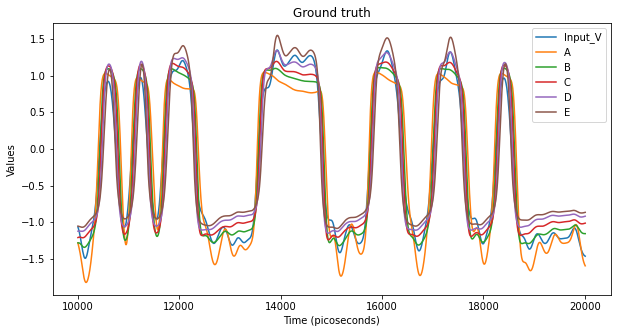

In [ ]:
start_i, end_i = 10000, 20000
fig = plt.figure(figsize = (10,5))
plt.title('Ground truth')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test, y_test], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()

먼저 실제 데이터의 시간에 따른 전압값을 시각화해봅니다.

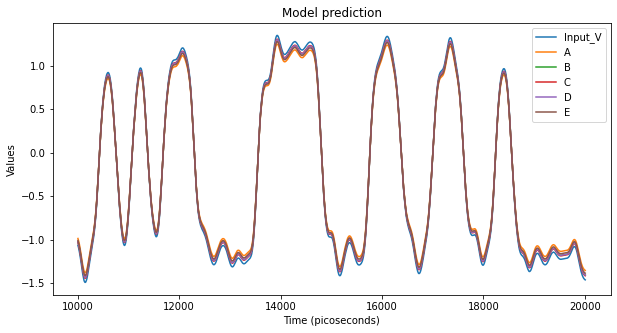

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.title('Model prediction')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test, pred], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()

입력전압과 거의 같도록 출력값을 예측하고 있습니다.

### 2.2 Ridge 선형회귀 모델
---
Ridge 선형 회귀 모델은 최소제곱 선형회귀 모델을 개량한 모델입니다.

#### 2.2.1 라이브러리 불러오기


In [ ]:
from sklearn.linear_model import Ridge

scikit-learn 라이브러리의 Ridge 클래스를 불러옵니다.

#### 2.2.2 모델 생성


In [ ]:
model = Ridge()

#### 2.2.3 모델 학습

In [ ]:
model.fit(X_train, y_train)

Ridge()

학습용 데이터를 이용하여 모델을 학습합니다. scikit learn 패키지의 `fit`함수를 사용하여 간편하게 모델을 학습할 수 있습니다.

#### 2.2.4 예측

In [ ]:
pred = model.predict(X_test)

학습한 모델에 테스트용 데이터의 입력 전압을 입력하여 출력 전압을 예측합니다.

#### 2.2.5 평가

In [ ]:
error = mse(y_test, pred)
print('Ridge 선형 회귀 모델의 오차: {}'.format(error))

Ridge 선형 회귀 모델의 오차: 0.4517912182971031


최소제곱 선형회귀 모델의 오차와 차이가 크지 않습니다.

#### 2.2.6 예측 결과 시각화

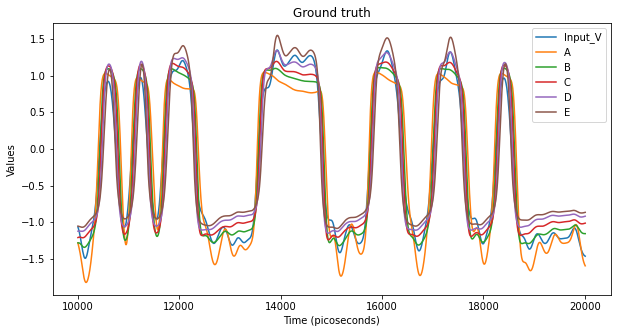

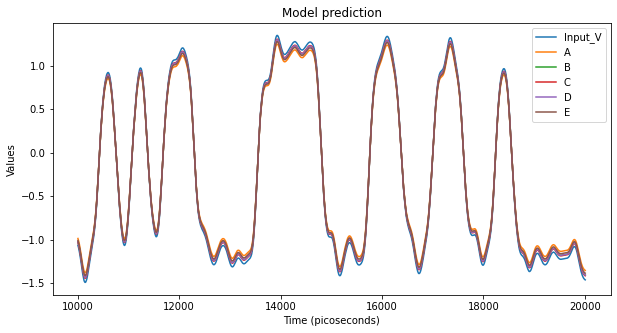

In [ ]:
# 정답 그래프 그리기
fig = plt.figure(figsize = (10,5))
plt.title('Ground truth')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test, y_test], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()
# 예측 그래프 그리기
fig = plt.figure(figsize = (10,5))
plt.title('Model prediction')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test, pred], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()

Ridge 모델이 예측한 결과를 시각화해봅니다. 마찬가지로, 입력 값과 거의 동일하게 출력값을 예측한 것을 확인할 수 있습니다.

### 2.3 다중 퍼셉트론 회귀 모델
---
다음으로는 다중 퍼셉트론 (multi layer perceptron, MLP) 회귀 모델을 활용해보겠습니다. 가장 단순한 형태의 뉴럴넷 모델이며, 앞선 회귀 모델과 다르게 비선형적 모델링이 가능합니다.

#### 2.3.1 라이브러리 불러오기


In [ ]:
from sklearn.neural_network import MLPRegressor

scikit-learn 라이브러리의 MLPRegressor 클래스를 불러옵니다.

#### 2.3.2 모델 생성


In [ ]:
model = MLPRegressor(hidden_layer_sizes=(32,32))

MLP의 히든레이어를 2개층으로 쌓고, 각각의 dimension은 32로 설정합니다. 나머지 설정은 default로 합니다.

#### 2.3.3 모델 학습

In [ ]:
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(32, 32))

학습용 데이터를 이용하여 모델을 학습합니다. scikit learn 패키지의 `fit`함수를 사용하여 간편하게 모델을 학습할 수 있습니다.

#### 2.3.4 예측

In [ ]:
pred = model.predict(X_test)

학습한 모델에 테스트용 데이터의 입력 전압을 입력하여 출력 전압을 예측합니다.

#### 2.3.5 평가

In [ ]:
error = mse(y_test, pred)
print('MLP 회귀 모델의 오차: {}'.format(error))

MLP 회귀 모델의 오차: 0.18030037609841398


선형 회귀 모델보다 오차가 줄었습니다.

#### 2.3.6 예측 결과 시각화

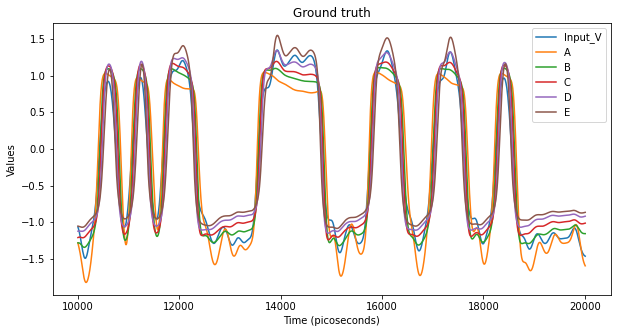

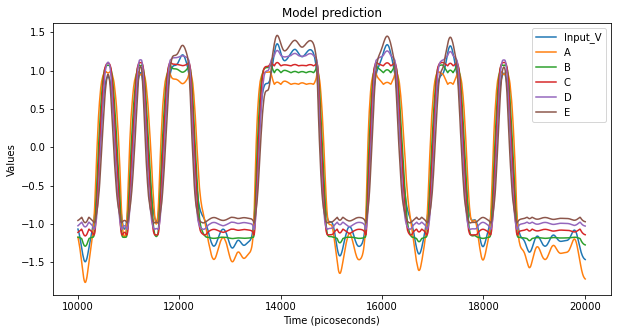

In [ ]:
# 정답 그래프 그리기
fig = plt.figure(figsize = (10,5))
plt.title('Ground truth')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test, y_test], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()
# 예측 그래프 그리기
fig = plt.figure(figsize = (10,5))
plt.title('Model prediction')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test, pred], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()

MLP 모델이 예측한 결과를 시각화해봅니다. 선형회귀 모델에 비해 더 그럴듯하게 예측한 모습을 보이지만, 정확도가 높아 보이지는 않습니다.

## 3. 데이터 변형
---
여태까지의 실습에서는 한 시점의 입력값만을 사용하여 출력 전압을 예측하도록 모델을 훈련하였습니다. 그러나, 출력값을 올바르게 예측하기 위해서는 한 시점 뿐만이 아니라, 그 이전 시점들에서의 입력 전압값들이 중요할 수 있습니다. 우리가 다루고 있는 전압 파형 데이터는 시계열 데이터이기 때문입니다. <br>
모델의 성능을 향상시키기 위하여 지금부터는 입력값으로 여러 시점의 입력 전압을 주도록 데이터를 수정해보겠습니다.

In [ ]:
def process_data(X, y, num_sequences, stride = 1):
    X_ = []
    for i in range(0, num_sequences):
        X_.append(X[i:len(X) - num_sequences + 1 + i])
    X_ = np.asarray(X_)[:, ::stride].transpose().reshape(-1, num_sequences)
    return X_, y[num_sequences - 1::stride]

입력 데이터가 `num_sequences` 동안의 입력값을 가지고, 입력 데이터 사이의 간격이 `stride`가 되도록 처리하는 `process_data` 함수를 정의합니다. 이 때, 출력값 `y`는 입력값의 마지막 시점에서의 출력값입니다.

In [ ]:
num_sequences = 50
stride = 1
X_train2, y_train2 = process_data(X_train, y_train, num_sequences, stride)
X_test2, y_test2 = process_data(X_test, y_test, num_sequences, stride)

`num_sequences`는 50, `stride`는 1로 설정하여 데이터를 수정합니다.

In [ ]:
print('X_train2 shape: {}, y_train2 shape: {}'.format(X_train2.shape, y_train2.shape))
print('X_test2 shape: {}, y_test2 shape: {}'.format(X_test2.shape, y_test2.shape))

X_train2 shape: (407005, 50), y_train2 shape: (407005, 5)
X_test2 shape: (193787, 50), y_test2 shape: (193787, 5)


입력데이터가 `num_sequences` 동안의 입력값 데이터를 누적하여 50차원으로 변환되었습니다.

## 4. 회귀 모델 수행 2
---
불러온 데이터는 한 시점의 입력 전압(`X`)과 출력 전압(`y`)이 pair되어 있습니다. 이 데이터를 활용하여 한 시점의 입력 전압으로부터 그 시점의 출력 전압을 예측하는 회귀 모델을 생성해보겠습니다.

### 4.1 최소제곱 선형회귀 모델
---
최소 제곱 선형 회귀 (least square linear regression) 모델은 가장 단순한 선형 회귀 모델입니다. 이 모델을 생성해보겠습니다.

#### 4.1.1 모델 학습

## [TODO] 최소제곱선형회귀 모델의 생성, 학습, 예측, 그리고 오차를 계산하는 코드를 작성하세요.

2.2 섹션에서처럼 최소제곱선형회귀 모델을 생성하되, 변형한 데이터 (`X_train2`, `y_train2`)를 이용하여 학습시키고, 변형한 데이터 (`X_test2`)에 대한 예측 결과를 평가해보세요.

In [ ]:
# 모델 생성
model = LinearRegression()
# TODO: 모델 훈련
model.fit(X_train2, y_train2)
pred = model.predict(X_test2)
# 오차 계산
error = mse(y_test2, pred)
print('최소 제곱 선형 회귀 모델의 오차: {}'.format(error))

최소 제곱 선형 회귀 모델의 오차: 0.32847136852871345


#### 4.1.2 예측 결과 시각화

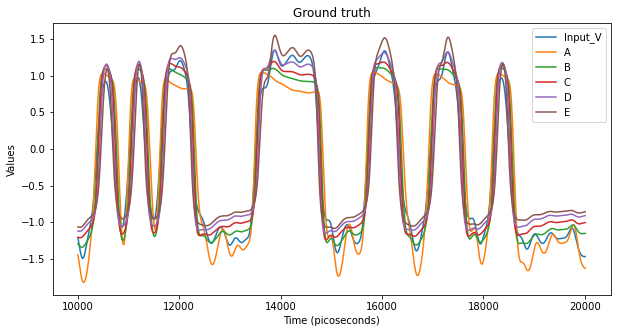

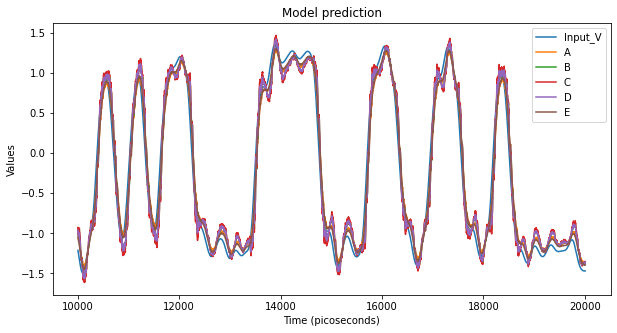

In [ ]:
# 정답 그래프 그리기
fig = plt.figure(figsize = (10,5))
plt.title('Ground truth')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test2[:, -1:], y_test2], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()
# 예측 그래프 그리기
fig = plt.figure(figsize = (10,5))
plt.title('Model prediction')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test2[:, -1:], pred], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()

### 4.2 Ridge 선형회귀 모델
---
Ridge 선형 회귀 모델은 최소제곱 선형회귀 모델을 개량한 모델입니다.

#### 4.2.1 모델 학습

## [TODO] Ridge 선형회귀 모델의 생성, 학습, 예측, 그리고 오차를 계산하는 코드를 작성하세요.

2.3 섹션에서처럼 최소제곱선형회귀 모델을 생성하되, 변형한 데이터 (`X_train2`, `y_train2`)를 이용하여 학습시키고, 변형한 데이터 (`X_test2`)에 대한 예측 결과를 평가해보세요.

In [ ]:
# 모델 생성
model = Ridge() # TODO
model.fit(X_train2, y_train2) # TODO: 모델 훈련
# 출력값 예측
pred = model.predict(X_test2) # TODO
# 오차 계산
error = mse(y_test2, pred) # TODO
print('Ridge 선형 회귀 모델의 오차: {}'.format(error))

Ridge 선형 회귀 모델의 오차: 0.33075132428634224


#### 4.2.2 예측 결과 시각화

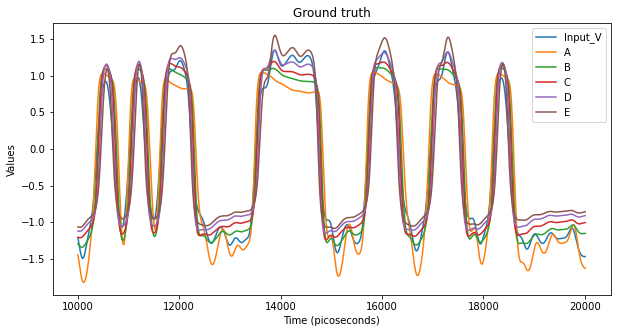

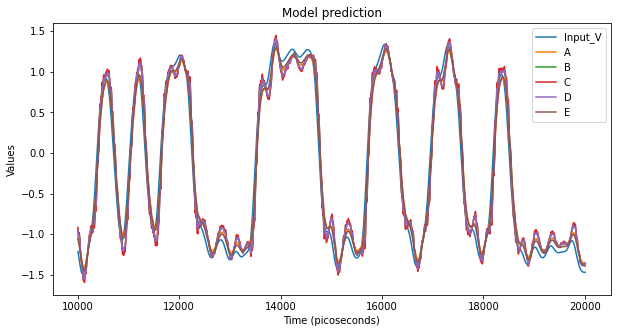

In [ ]:
# 정답 그래프 그리기
fig = plt.figure(figsize = (10,5))
plt.title('Ground truth')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test2[:, -1:], y_test2], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()
# 예측 그래프 그리기
fig = plt.figure(figsize = (10,5))
plt.title('Model prediction')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test2[:, -1:], pred], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()

### 4.3 다중 퍼셉트론 회귀 모델
---
다음으로는 다중 퍼셉트론 (multi layer perceptron, MLP) 회귀 모델을 활용해보겠습니다. 가장 단순한 형태의 뉴럴넷 모델이며, 앞선 회귀 모델과 다르게 비선형적 모델링이 가능합니다.

#### 4.3.1 모델 학습

## [TODO] MLP 회귀 모델의 생성, 학습, 예측, 그리고 오차를 계산하는 코드를 작성하세요.

2.4 섹션에서처럼 MLP 회귀 모델을 생성하되, 변형한 데이터 (`X_train2`, `y_train2`)를 이용하여 학습시키고, 변형한 데이터 (`X_test2`)에 대한 예측 결과를 평가해보세요. MLP의 hidden layer는 2.4 와 똑같이 설정합니다.

In [ ]:
# 모델 생성
model = MLPRegressor(hidden_layer_sizes=(32,32)) # TODO
# TODO: 모델 학습
model.fit(X_train2, y_train2)
# 모델 예측
pred = model.predict(X_test2) # TODO
# 모델 평가
error = mse(y_test2, pred) # TODO
print('MLP 회귀 모델의 오차: {}'.format(error))

MLP 회귀 모델의 오차: 0.013448686831417742


비선형 모델을 적용하니 오차가 많이 줄었습니다.

#### 4.3.2 예측 결과 시각화

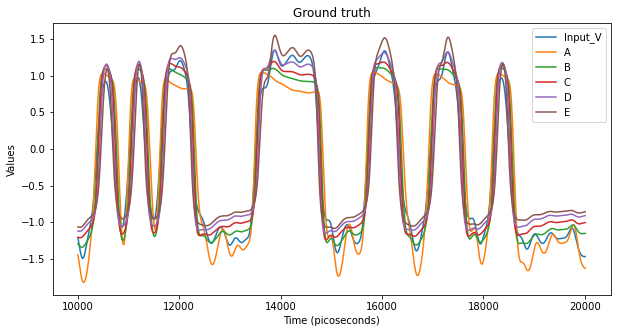

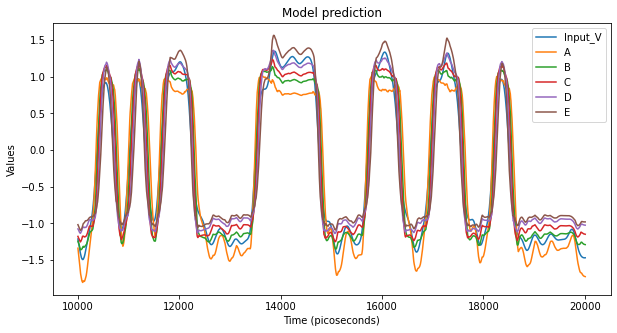

In [ ]:
# 정답 그래프 그리기
fig = plt.figure(figsize = (10,5))
plt.title('Ground truth')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test2[:, -1:], y_test2], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()
# 예측 그래프 그리기
fig = plt.figure(figsize = (10,5))
plt.title('Model prediction')
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_test2[:, -1:], pred], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()

MLP 모델이 예측한 결과를 시각화해봅니다. 선형회귀 모델에 비해 더 그럴듯하게 예측한 모습을 보였습니다. 시계열 모델을 사용하게 되면 어떨까요? 다음 장에서 시계열 모델을 학습해보겠습니다.

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>

---